(ebm:exercise)=
# Simplified Energy Balance Model

**Task 1:** Write a Python function for the OLR and effective temperature for later use.

In [1]:
# Stefan-Boltzmann constant
sigma = 5.67e-8

def T_eff(OLR):
    """ Effective global mean emission temperature """
    return (OLR / sigma) ** (1/4)
     
def OLR(T):
    """ Stefan-Boltzmann law """
    return sigma * T **4

T_eff(396)

289.0866468789842

**Task 2:** Extend the OLR function by another **transmissivity** constant $\tau$ which takes this effect into account. Determine the transmissivity for a global mean temperature of 288 K.

In [2]:
def OLR(T, trans):
    """ Stefan-Boltzmann law """
    return(trans * sigma * T**4)

def tau(olr, T):
    """ Calculate transmissivity """
    return(olr / (sigma  * T**4))

In [3]:
# W/m^2
# Global mean temperature 288 K

# Print the results
round(tau(239, 288), 2)

0.61

**Task 3:** Determine the planetary albedo from the observations and write a function for the absorbed shortwave radiation, the part of the incoming sunlight that is not reflected back to space

In [4]:
# Overall SW incoming - 341 W/m^2
# Overall SW reflected - 102 W/m^2

# Calculate the planetary albedo
def albedo(incoming, reflected):
    return reflected / incoming

def ASR(albedo, incoming):
    return incoming * (1 - albedo)

albedo(341, 102)
ASR(albedo(341, 102), 341)


239.00000000000003

**Task 4:** What additional amount of energy would have to remain in the system for the global temperature to rise by 4 K?

In [5]:
new_t = 292
old_t = 288
transmissivity = 0.61

added_energy = round(OLR(new_t, transmissivity) - OLR(old_t, transmissivity), 2)

print(f'For the global temperature to rise by {new_t - old_t}, there would need to be {added_energy} W/m^2 of added energy.')

For the global temperature to rise by 4, there would need to be 13.5 W/m^2 of added energy.


In [6]:
# Print the results

**Task 5:** Rearrange the equation according to the temperature denoting our equilibrium temperature. Substitute the observed values for insolation, transmissivity and planetary albedo and calculate the equlibrium temperature.

In [7]:
def equilibrium_temperature(alpha,Q,tau):
    """ Equilibrium temperature """
    return (ASR(alpha, Q) / (sigma * tau))**(1/4)

equilibrium_temperature(albedo(341, 102), 341, 0.61)

288.3176647817348

In [8]:
# Print the results

**Task 6:** With simple approaches such as equlibrium temperature, conceptual scenarios can be calculated. For example, the connection between the increase in albedo due to more cloud cover and the associated decrease in transmissivity can be investigated. For example, assume that the planetary albedo increases to 0.32 due to more cloud cover and that the transmissivity decreases to 0.57. What is the equilibrium temperature?

In [9]:
equilibrium_temperature(.32, 341, .57)

291.0391037261307

**Task 8:** Write a function called *step_forward(T, dt)* that returns the new temperature given the old temeprature T and timestep dt. Assume an initial temperature of 288 K and integrate the function for a few timestep and observe how the temperature changes.

In [30]:
def step_forward(Q, T, Cw, alpha, trans, dt):
    return (ASR(alpha, Q) + OLR(T, trans)) * dt / Cw + T

In [37]:
# Do first step forward
Q = 341
T = 288
alpha = albedo(341, 102)
transmissivity = tau(239, T)
dt = 365 * 24 * 60 * 60 # year to sec
Cw = 10**10
T_2 = step_forward(Q, T, Cw, alpha, tau(239, T), dt)
print(T_2)

289.5074208


In [38]:
# Do second step forward
T_3 = step_forward(Q, T_2, Cw, alpha, tau(239, T), dt)
print(T_3)

291.0307459062985


In [39]:
# Do third step forward
T_4 = step_forward(Q, T_3, Cw, alpha, tau(239, T), dt)
print(T_4)

292.57039748966497


**Task 9:** Integrate the equation over a time of 200 years and plot the result. Use the following initial and boundary conditions: 

$
\begin{align}
S_0 &=1360 ~ W m^{-2} \\
T_0 &= 273 ~ K \\ 
C_w &= 10^8 ~ J/(m^2 \cdot K) \\
\alpha &= 0.3 \\
\tau &= 0.64
\end{align}
$

In [118]:
import numpy as np
import matplotlib.pyplot as plt


def OLR(T, trans):
    """ Stefan-Boltzmann law """
    return(trans * sigma * T**4)


def ASR(albedo, incoming):
    return incoming * (1 - albedo)


def step_forward(Q, T, Cw, alpha, trans, dt):
    """ Time integration """
    return (ASR(alpha, Q) - OLR(T, trans)) * dt / Cw + T

def ebm(T0, Q=341.3, Cw=10e8, alpha=0.3, trans=0.64, years=100):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.'''
    temps_arr = np.zeros(years + 1)
    years_arr = np.arange(0, years+1)
    
    temps_arr[0] = T0
    dt = 365 * 24 * 60 * 60
    
    for idx, temp_now in enumerate(temps_arr[:-1]):
        temps_arr[idx + 1] = step_forward(Q, temp_now, Cw, alpha, trans, dt)
    return temps_arr, years_arr



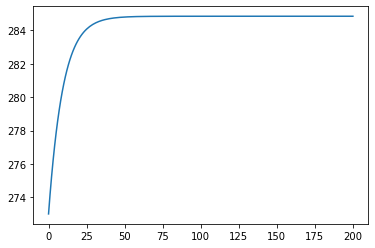

In [119]:
# Experiment 1
temps_0, years_0 = ebm(273, years=200)
plt.plot(years_0, temps_0)

**Task 10:** What happens if the intial temperature is set to 293 K ?

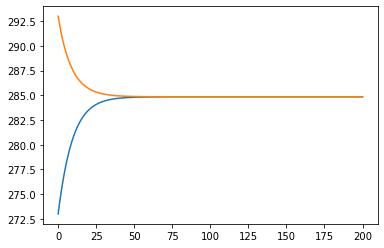

In [129]:
# Experiment 2
temps_1, years_1 = ebm(293, years=200)

plt.figure()
plt.plot(years_0, temps_0)
plt.plot(years_1, temps_1)

**Task 11:** What changes do you observe with a higher $C_w$ value (e.g. $C_w=10\cdot10^8 ~ J/(m^2 \cdot K)$)?


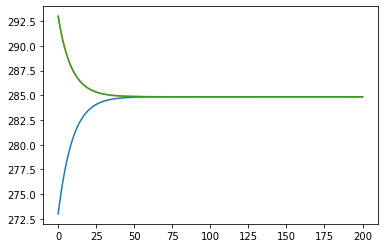

In [130]:
# Experiment 3
temps_2, years_2 = ebm(293, Cw=10**9, years=200)

plt.figure()
plt.plot(years_0, temps_0)
plt.plot(years_1, temps_1)
plt.plot(years_2, temps_2)

**Task 12:** How does the result change when $\tau=1$?

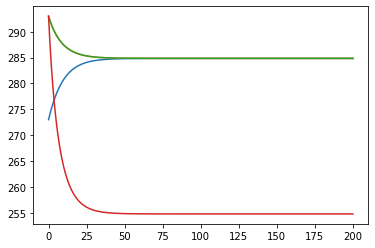

In [122]:
# Experiment 4
temps_3, years_3 = ebm(293, Cw=10**9, trans=1, years=200)

plt.figure()
plt.plot(years_0, temps_0)
plt.plot(years_1, temps_1)
plt.plot(years_2, temps_2)
plt.plot(years_3, temps_3)

### Case Study: Venus. 

Calculate the mean surface temperature on Venus. Due to its proximity to the Sun, Venus has a very high irradiance of $S_{0}=2619 ~ Wm^{-2}$. Due to the high cloud cover, the albedo is about 0.7. What surface temperature can be expected? (Use the previous values for $C_w$ and $\tau$).

271.24293325695794


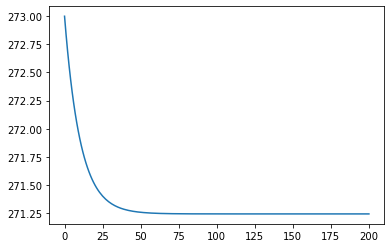

In [123]:
# Experiment 5
temps_v0, years_v0 = ebm(273, Q=2619/4, alpha=0.7, years=200)
plt.plot(years_v0, temps_v0)

print(temps_v0[-1])

Compare the measurements with your simulation. 

Is there a difference? If so, why does this difference exist? (Use the model to prove your hypothesis)

692.2556394132799


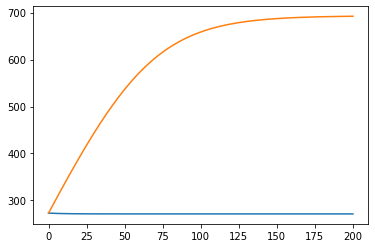

In [127]:
# Experiment 6
temps_v1, years_v1 = ebm(273, Q=2619/4, alpha=0.7, trans=0.015, years=200)

plt.figure()
plt.plot(years_v0, temps_v0)
plt.plot(years_v1, temps_v1)

print(temps_v1[-1])